# Generating

In [8]:
import torch
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
import diffusers
import matplotlib.pyplot as plt
from datasets import load_dataset
from torchvision import transforms

In [15]:
def show_images(images_tensor:torch.tensor):
    n_dims = images_tensor.dim()
    
    if n_dims in (2,3):
        x_cat = images_tensor

    elif n_dims == 4:
        x_list = [img for img in images_tensor]
        x_cat = torch.cat(x_list,dim=2)
    
    else:
        raise SyntaxError("The dimensions of images_tensor must be between 2 and 4")

    if n_dims != 2:
        if x_cat.shape[0] == 1:
            plt.imshow(x_cat.movedim(0,-1),cmap="gray");
        else:
            plt.imshow(x_cat.movedim(0,-1));
    else:
        plt.imshow(x_cat,cmap="gray");

In [9]:
scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)

In [10]:
model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=64,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D"
        ),

).cuda()
model.load_state_dict(torch.load("First_train.pth", weights_only=True))
model.eval()

UNet2DModel(
  (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

In [12]:
pipeline = DDPMPipeline(unet=model, scheduler=scheduler)
ims = pipeline(batch_size=4).images

  0%|          | 0/1000 [00:00<?, ?it/s]

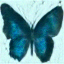

In [13]:
ims[0]

## Let's do it from scratch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.194438..3.66427].


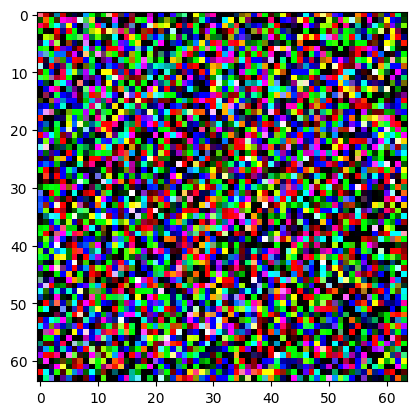

In [51]:
noise = torch.randn((1,3,64,64)).cuda()
show_images(noise.cpu())

In [19]:
# Download Dataset from hugging-face
dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")
# train_dataset,val_dataset,test_dataset = torch.utils.data.random_split(dataset,(0.8,0.1,0.1))

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
#   Create the Dataloader
dataset.set_transform(transform)
batch_size = 16

# train_dataloader = torch.utils.data.DataLoader(
#     dataset,
#     batch_size=batch_size,
#     shuffle=True
# )

# val_dataloader = torch.utils.data.DataLoader(
#     val_dataset,
#     batch_size=batch_size,
#     shuffle=True
# )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.78039217..1.0].


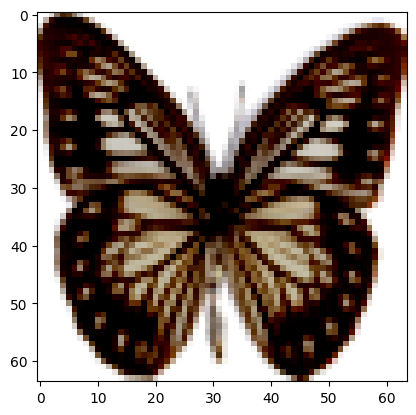

In [ ]:
# Take an image
img = dataset[858]["images"].cuda()
show_images(img.cpu())

In [ ]:
#Take a random Timestep
random_timestep = torch.randint(0,250,(1,)).cuda()
random_timestep

tensor([209], device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2310605..1.6924642].


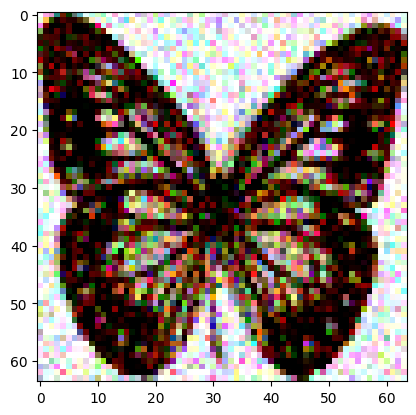

In [115]:
# Add noise to the image
# noisy_img = scheduler.add_noise(img,noise,random_timestep)
noisy_img = img + (noise * (random_timestep/1000))
show_images(noisy_img.cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9753556..2.5427742].


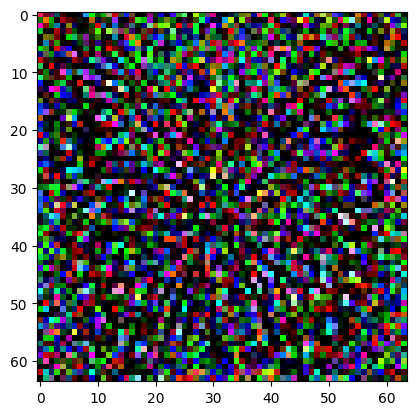

In [116]:
#Prediction of noise
noise_pred = model(noisy_img,random_timestep, return_dict=False)[0]
show_images(noise_pred.detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.194438..3.66427].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9753556..2.5427742].


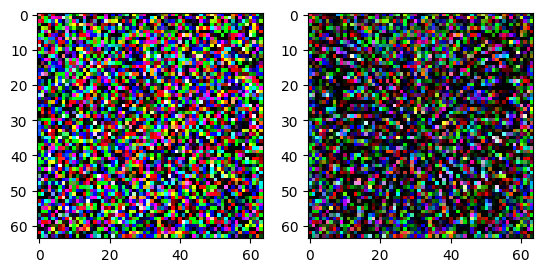

In [117]:
# Compare real noise vs predicted noise
plt.subplot(1,2,1)
plt.imshow(noise.squeeze(0).cpu().movedim(0,-1));

plt.subplot(1,2,2)
plt.imshow(noise_pred.squeeze(0).detach().cpu().movedim(0,-1));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2310605..1.6924642].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0126894..1.3797209].


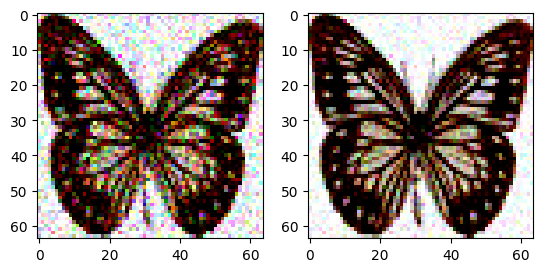

In [120]:
#Compare original noisy image vs predicted noisy image
plt.subplot(1,2,1)
plt.imshow(noisy_img.squeeze(0).cpu().movedim(0,-1));

plt.subplot(1,2,2)
# plt.imshow(noise_pred.squeeze(0).detach().cpu().movedim(0,-1));

# noisy_pred_img = scheduler.add_noise(img,noise_pred,random_timestep)
noisy_pred_img = img + (noise_pred*(random_timestep/1000))
show_images(noisy_pred_img.detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41284934..0.53143984].


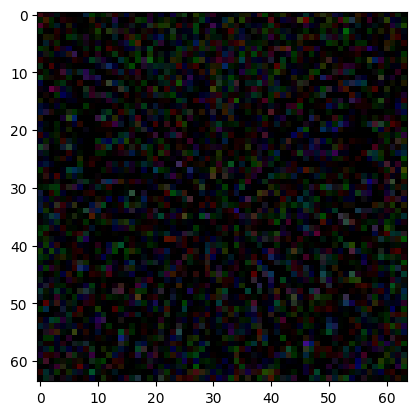

In [121]:
#Scale the noise with the timestep value
noise_pred_valuated = noise_pred * (random_timestep/scheduler.config.num_train_timesteps)
show_images(noise_pred_valuated.detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0126894..1.3797209].


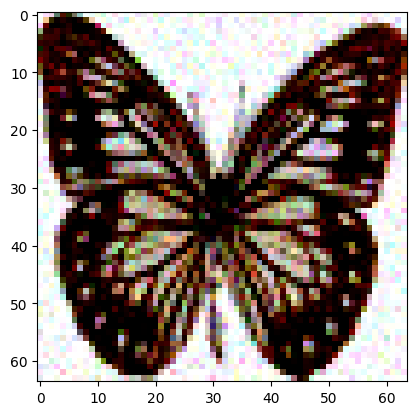

In [122]:
img_reconstructed = img + noise_pred_valuated
show_images(img_reconstructed.detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0252163..2.3313773].


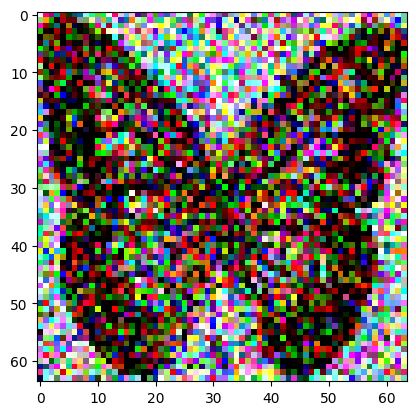

In [ ]:
# A try to delete noise from OG noisy img with the predicted noise
generation_predicted = noisy_img - (noise_pred *(random_timestep/scheduler.config.num_train_timesteps))

show_images(generation_predicted.detach().cpu())